### Necessary imports

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

### One Time pre-processing required to Convert the dataset from .arff format to .csv format and store it for future use.

In [2]:
# # Load Dataset
# path_to_dataset = './Training Dataset.arff'
# data = arff.loadarff(path_to_dataset)
# df = pd.DataFrame(data[0])

# # Convert the data from byte format to strings
# cols = list(df.columns)
# csv_dataset = []

# for i in range(len(df)):
#     row = list(df.iloc[i])
#     new_row = [val.decode('utf-8') for val in row]    
#     csv_dataset.append(new_row)

# # Convert the list of strings to np array
# csv_dataset = np.array(csv_dataset)

# # Convert the np array to pandas dataframe
# df_updated = pd.DataFrame(csv_dataset, columns = cols)

# # Save the data frame as CSV file
# df_updated.to_csv('dataset.csv')

### Import the dataset

In [3]:
path_to_dataset_csv = './dataset.csv'
data = pd.read_csv(path_to_dataset_csv,index_col=0)
data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


### Describe the Dataset

In [4]:
data.shape

(11055, 31)

In [5]:
data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Check dataset for null values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [11]:
data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

### Drop any null/nan values

In [12]:
data = data.dropna()
data.shape

(11055, 31)

### Check if we have class imbalance

<AxesSubplot: >

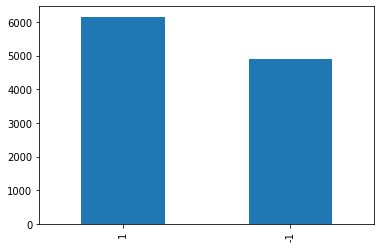

In [14]:
pd.value_counts(data['Result']).plot.bar()

### Drop duplicates

In [15]:
# data = data.drop_duplicates()
# data.shape

### Check for counts of different values

In [16]:
counts_data_frame = pd.DataFrame()
counts_data_frame['count_of'] = [-1,0,1]
cols = list(data.columns)
for col in cols:
    cnt = data[col].value_counts()
    l = np.zeros(3)
    for val in cnt.index.values:
        l[val+1] = cnt[val]
    counts_data_frame[col] = l

counts_data_frame.set_index('count_of', inplace=True)
counts_data_frame

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count_of,,,,,,,,,,,,,,,,,,,,,
-1,3793.0,8960.0,1444.0,1655.0,1429.0,9590.0,3363.0,3557.0,7389.0,2053.0,...,2137.0,1012.0,5189.0,3443.0,2655.0,8201.0,1539.0,548.0,1550.0,4898.0
0,0.0,135.0,0.0,0.0,0.0,0.0,3622.0,1167.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2569.0,0.0,0.0,6156.0,0.0,0.0
1,7262.0,1960.0,9611.0,9400.0,9626.0,1465.0,4070.0,6331.0,3666.0,9002.0,...,8918.0,10043.0,5866.0,7612.0,5831.0,2854.0,9516.0,4351.0,9505.0,6157.0


### Draw Plots for different values in for each attribute

In [24]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (10 * nGraphPerRow, 12 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

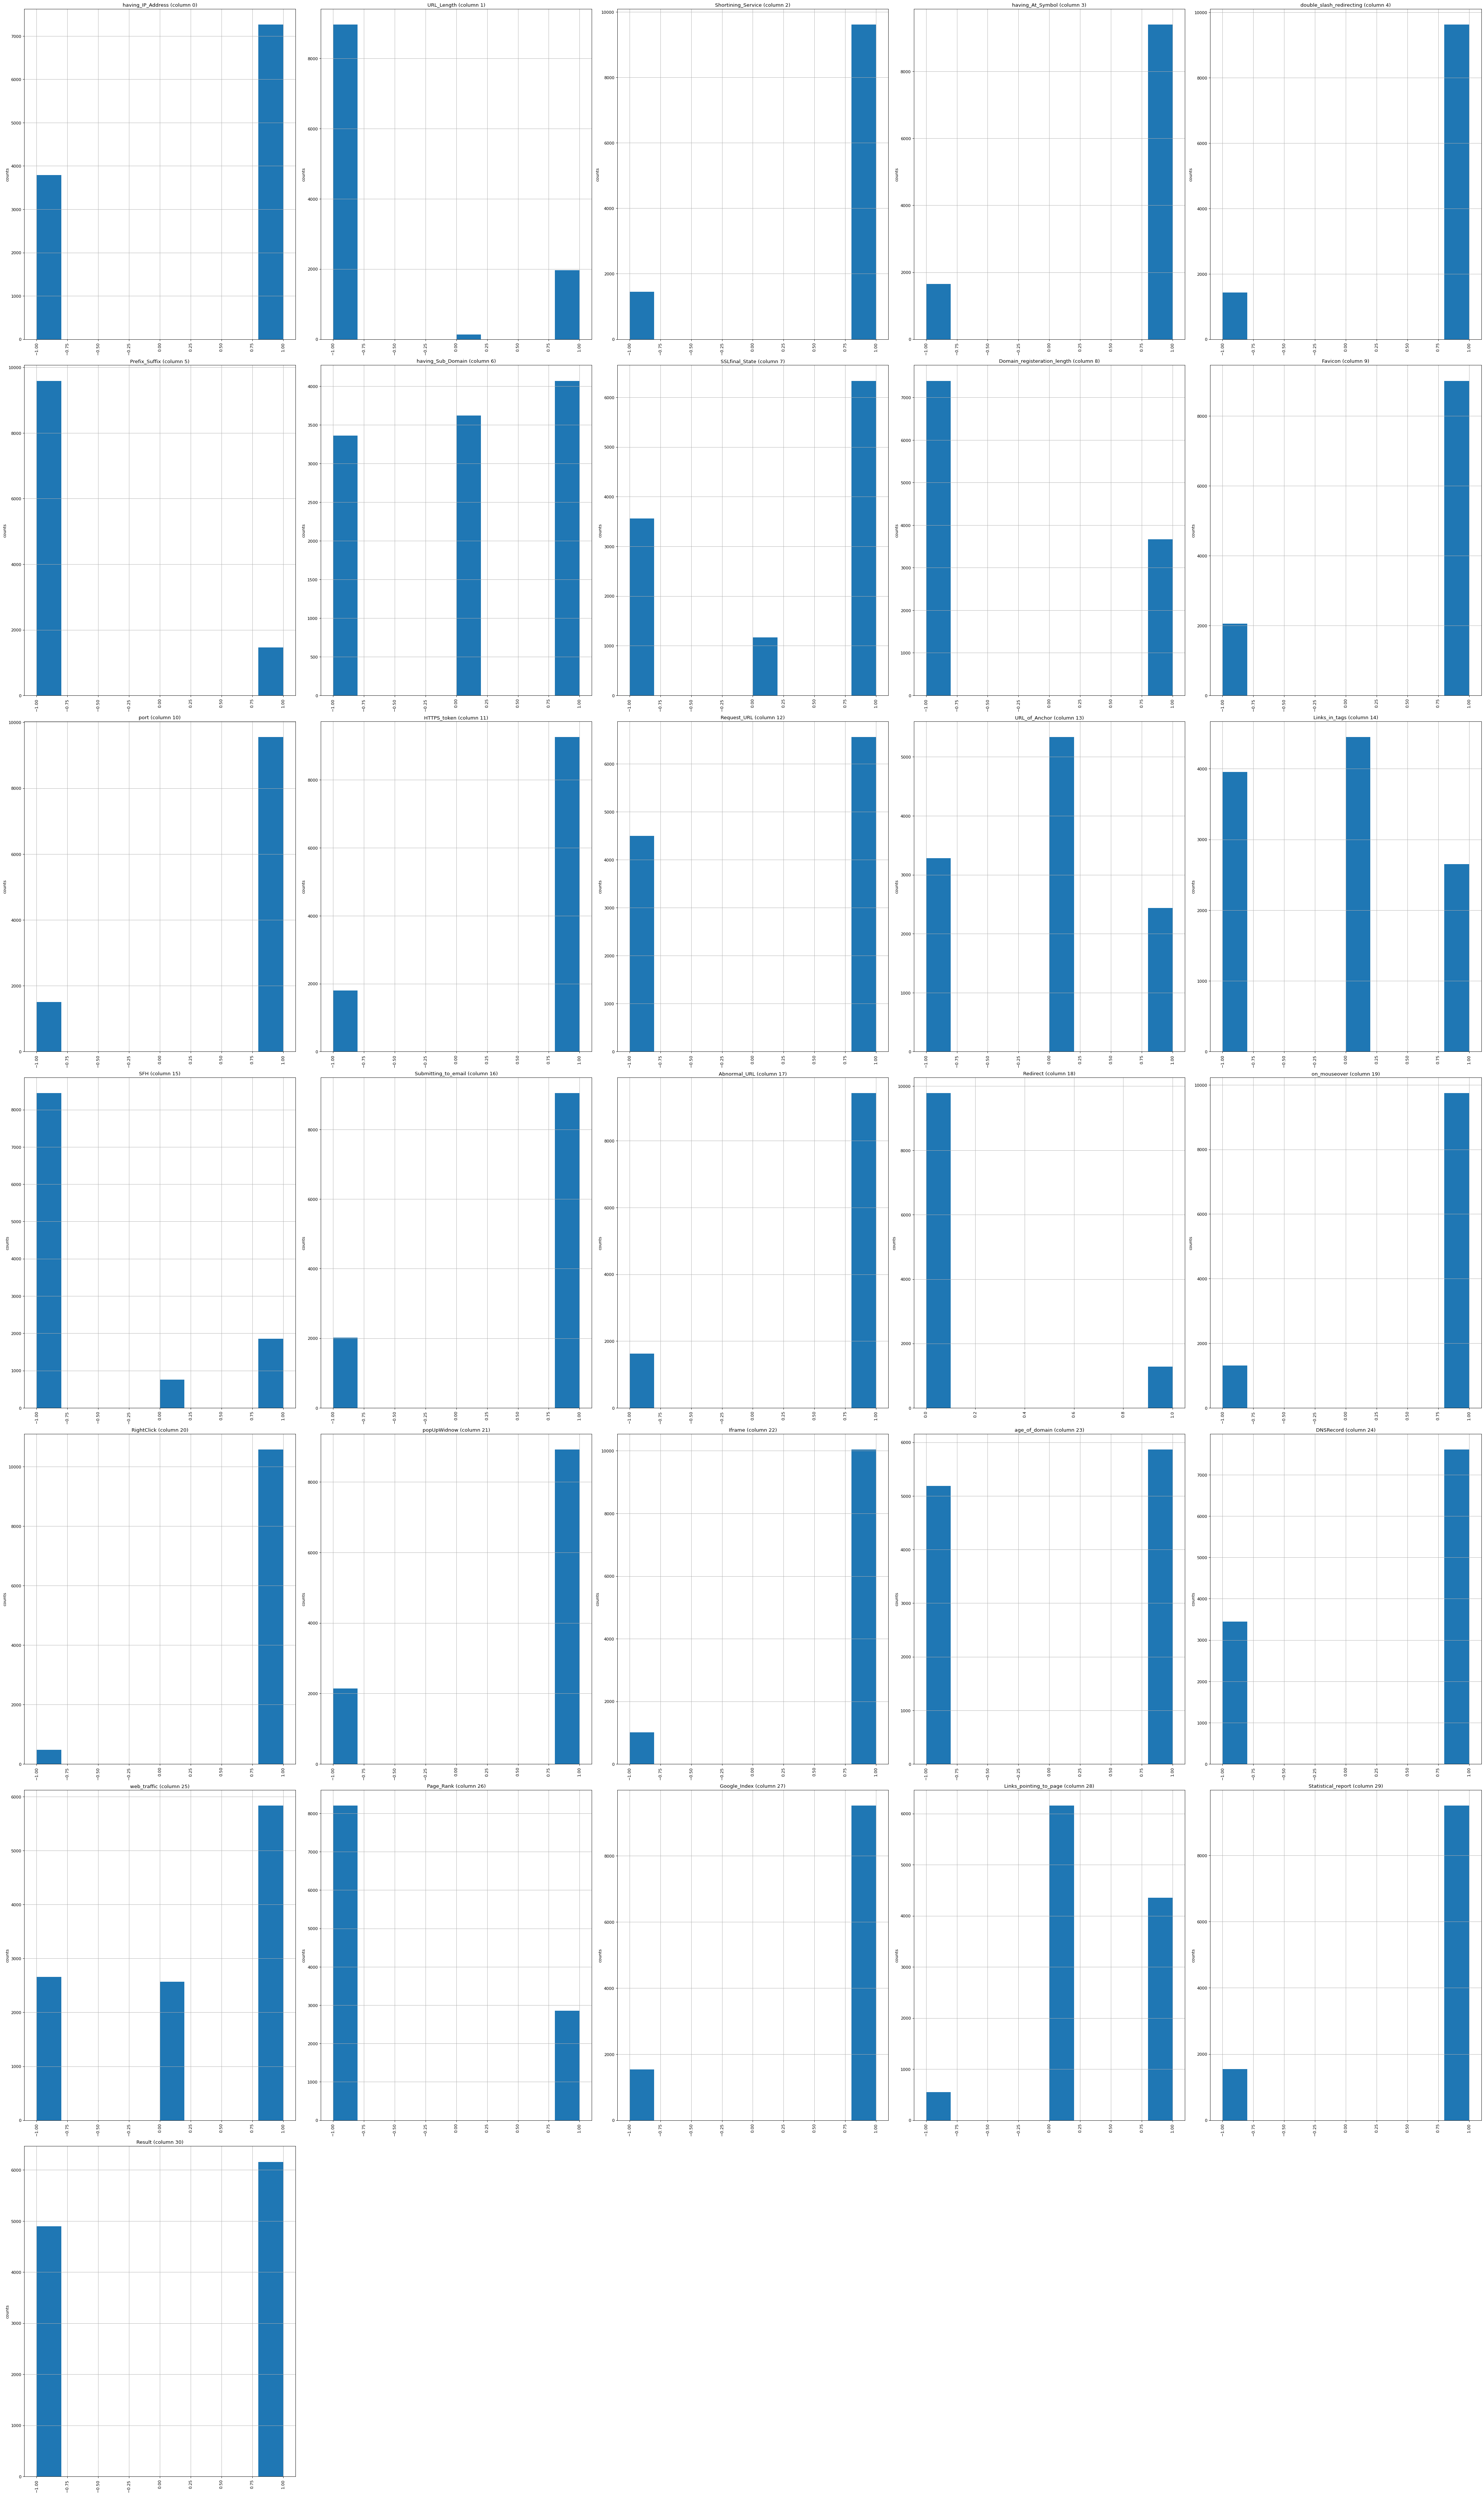

In [25]:
plotPerColumnDistribution(data, 50, 5)

### Distribution of classes per attribute

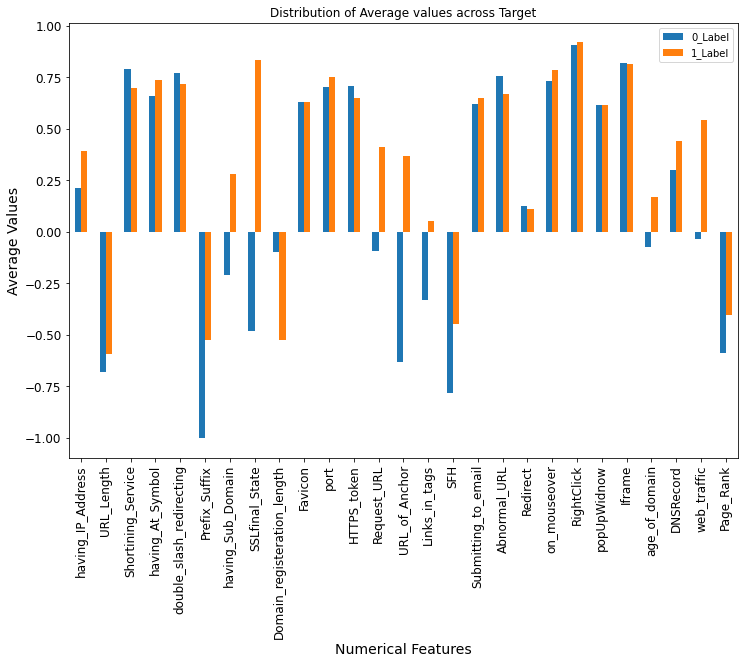

In [38]:
cols = data.columns[:-1]
df_distr =data.groupby('Result')[cols].mean().reset_index().T
df_distr.rename(columns={0:'0_Label',1:"1_Label"}, inplace=True)

#plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='w'
ax = df_distr[1:-3][['0_Label','1_Label']].plot(kind='bar', title ="Distribution of Average values across Target", figsize=(12, 8), legend=True, fontsize=12)
ax.set_xlabel("Numerical Features", fontsize=14)
ax.set_ylabel("Average Values", fontsize=14)
#ax.set_ylim(0,500000)
plt.show()

### Draw pairplots

In [39]:
# Pairplot will take a lot of time as 31*30 = 900 plots with 11000 samples.
# Will load it from filesystem after generating it once
# sns.pairplot(data, hue="Result")

### Check for co-relation between different features

<AxesSubplot: >

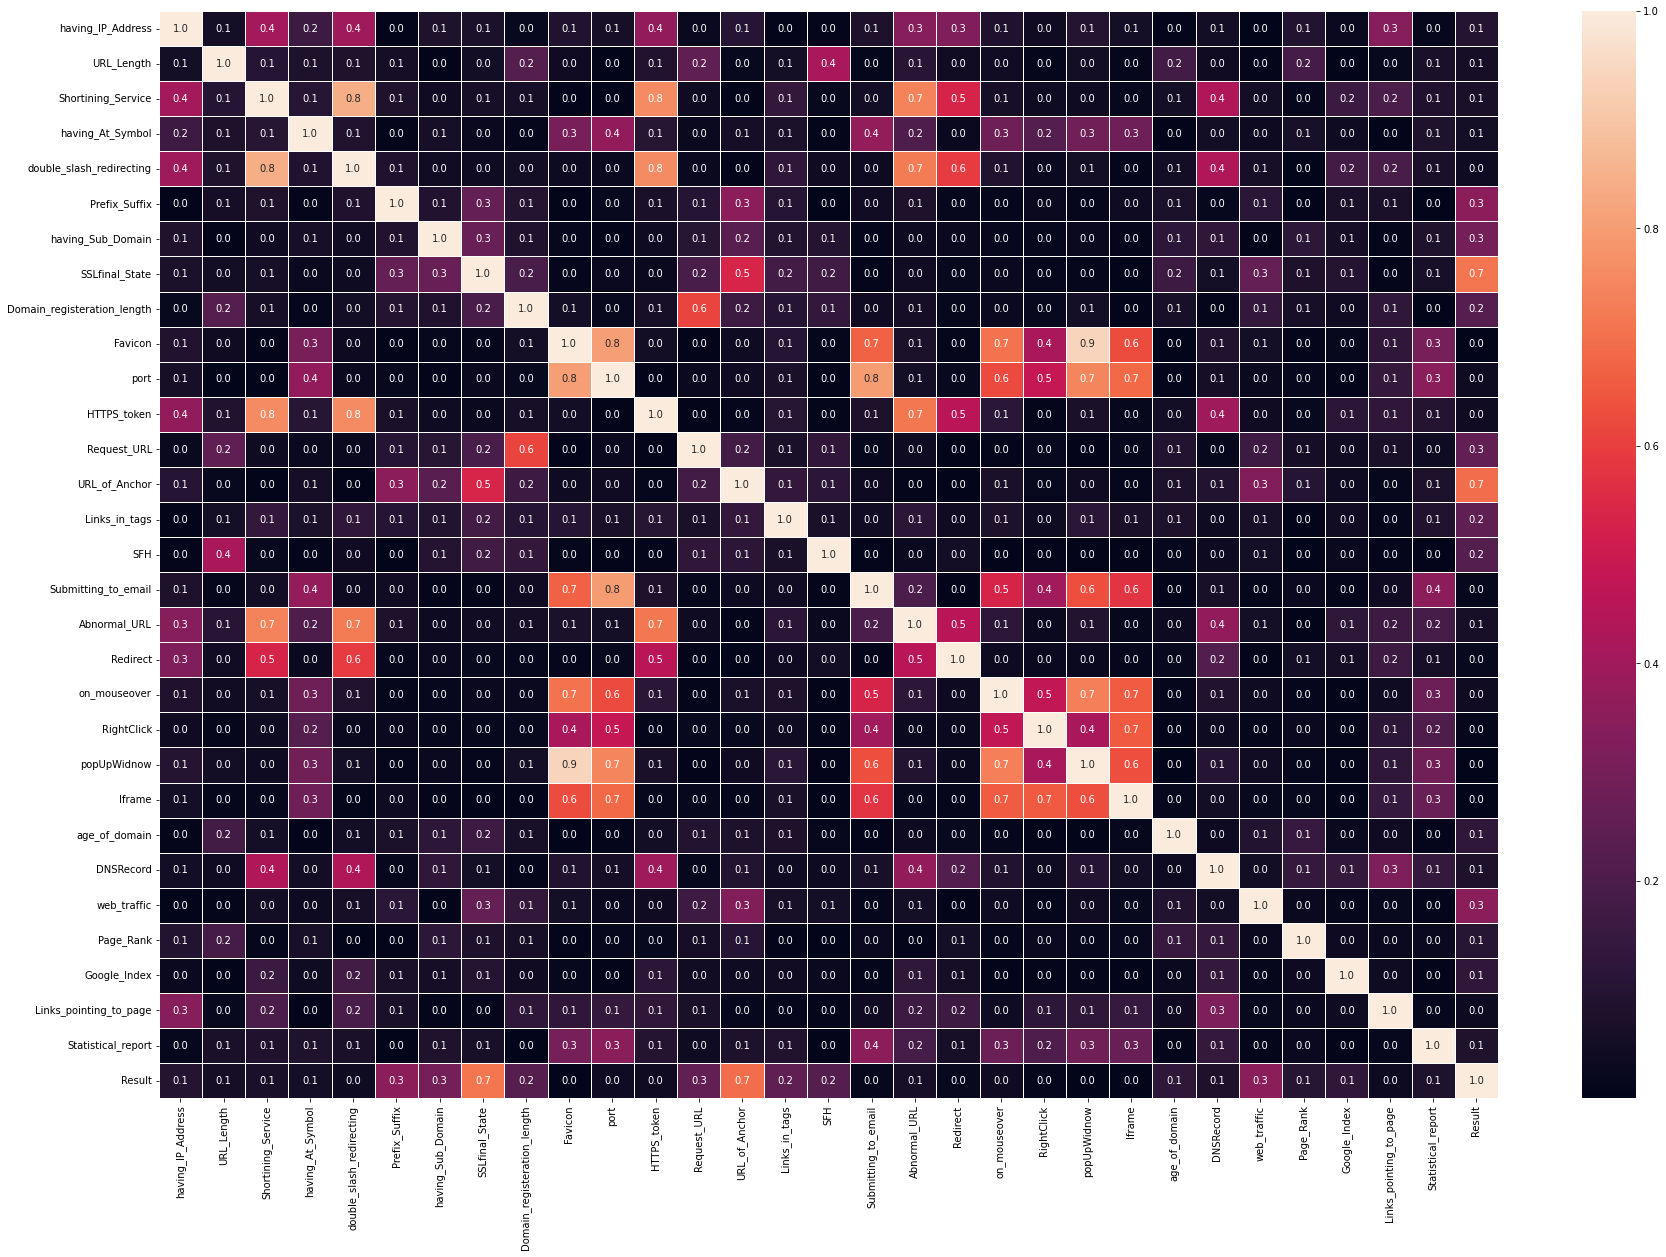

In [41]:
plt.figure(figsize=(30, 20))
sns.heatmap(data.corr().abs(),  annot=True, linewidths=.5, fmt= '.1f')

### Using co-relation we can check which features affect the result more than others.

In [42]:
# mean_of_corr_for_result = sum(data.corr().abs()['Result'][:-1])/len(data.corr().abs()['Result'][:-1])
# cols_with_corr_greater_than_mean = {}

# for col in data.corr().abs()['Result'][:-1].index:
#     if data.corr().abs()['Result'][:-1][col] > mean_of_corr_for_result:
#         cols_with_corr_greater_than_mean[col] = data.corr().abs()['Result'][:-1][col]
# print (cols_with_corr_greater_than_mean)

### Set data in X and Y

In [43]:
X = np.array(data.drop(columns=['Result']))
Y = np.array(data['Result'])
print (X.shape)
print (Y.shape)

print (np.unique(Y, return_counts=True))
Y[Y == -1] = 0
print(np.unique(Y, return_counts=True))

(11055, 30)
(11055,)
(array([-1,  1], dtype=int64), array([4898, 6157], dtype=int64))
(array([0, 1], dtype=int64), array([4898, 6157], dtype=int64))


### T-SNE for data

In [44]:
# We want to get TSNE embedding with 2 dimensions only
tsne = TSNE(2, learning_rate='auto', n_iter=300,init='pca',random_state=15)
tsne_result = tsne.fit_transform(X)
print ('Reduced to ', tsne_result.shape,' in ',tsne.n_iter_ , ' iterations')

C:\Users\yg375\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Reduced to  (11055, 2)  in  299  iterations


In [45]:
tsne_result

array([[ 5.233927  ,  4.6154637 ],
       [-8.989216  ,  0.42735493],
       [-9.9599085 , -0.70245534],
       ...,
       [-4.9311314 ,  3.0296245 ],
       [ 5.5032177 , -9.925207  ],
       [ 3.6815255 , -8.981323  ]], dtype=float32)

In [46]:
phishing_result = tsne_result[Y == 1]
benign_result = tsne_result[Y == 0]

print(phishing_result.shape)
print(benign_result.shape)

(6157, 2)
(4898, 2)


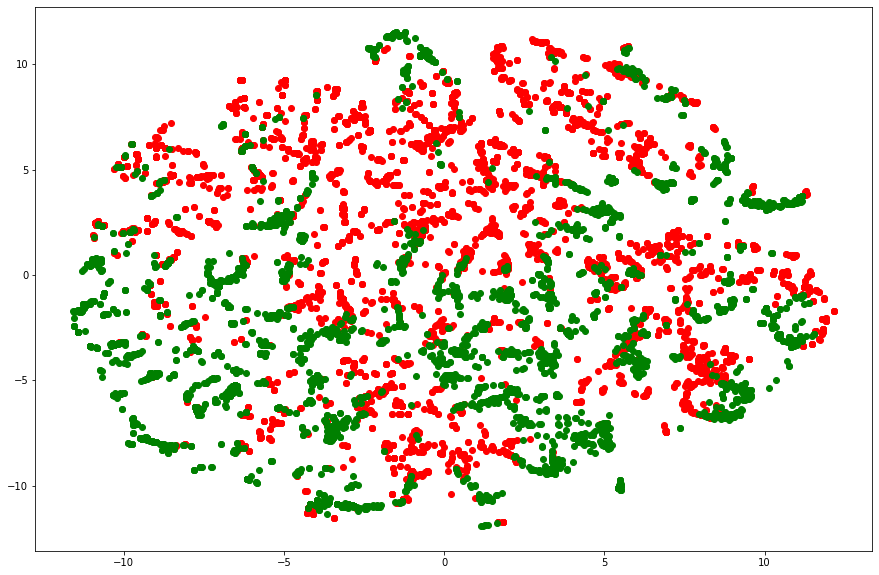

In [47]:
plt.figure(figsize=(15,10))
plt.scatter(phishing_result[:,0], phishing_result[:,1], color='red')
plt.scatter(benign_result[:,0], benign_result[:,1], color='green')
plt.show()

### Split data in test and train to check

In [48]:
train_data, test_data, train_labels, test_labels = train_test_split(tsne_result, Y, test_size=0.3, random_state=20)

print (train_data.shape, train_labels.shape)
print (test_data.shape, test_labels.shape)

(7738, 2) (7738,)
(3317, 2) (3317,)


### Create a Perceptron Class

In [49]:
class Perceptron1:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

### Train perceptron multiple times to average out the accuracy for TSNE embeddings

In [50]:
test_loss = []
test_loss1 = []
train_loss = []
train_loss1 = []

for epoch in range(20):
    
    print('epoch ->', epoch)

    p = Perceptron()
    p1 = Perceptron1(learning_rate = 0.01, n_iters= 1000)
    
    train_data, test_data, train_labels, test_labels = train_test_split(tsne_result, Y, test_size=0.3)

    p.fit(train_data, train_labels)
    p1.fit(train_data, train_labels)

    predictions_train = p.predict(train_data)
    predictions_train1 = p1.predict(train_data)
    
    predictions_test = p.predict(test_data)
    predictions_test1 = p1.predict(test_data)
    
    train_score = accuracy_score(predictions_train, train_labels)
    train_score1 = accuracy_score(predictions_train1, train_labels)
    
    test_score = accuracy_score(predictions_test, test_labels)
    test_score1 = accuracy_score(predictions_test1, test_labels)

    print ('train accuracy = ', train_score)
    print ('train accuracy1 = ', train_score1)
    
    print ('test accuracy = ', test_score)
    print ('test accuracy1 = ', test_score1)
    
    print ('iterations used for inbuilt = ', p.n_iter_)
    print ('iterations used for custom = ', p1.n_iters)
    
    test_loss.append(test_score)    
    test_loss1.append(test_score1)    
    
    train_loss.append(train_score)
    train_loss1.append(train_score1)
    
    print ()

epoch -> 0
train accuracy =  0.3552597570431636
train accuracy1 =  0.6403463427242182
test accuracy =  0.3659933675007537
test accuracy1 =  0.6337051552607779
iterations used for inbuilt =  12
iterations used for custom =  1000

epoch -> 1
train accuracy =  0.5880072370121479
train accuracy1 =  0.5904626518480227
test accuracy =  0.5746156165209527
test accuracy1 =  0.5812481157672595
iterations used for inbuilt =  8
iterations used for custom =  1000

epoch -> 2
train accuracy =  0.6119152235719825
train accuracy1 =  0.6705867149134144
test accuracy =  0.6020500452215858
test accuracy1 =  0.6629484473922219
iterations used for inbuilt =  16
iterations used for custom =  1000

epoch -> 3
train accuracy =  0.44727319720858105
train accuracy1 =  0.6005427759110882
test accuracy =  0.4498040397949955
test accuracy1 =  0.5917998191136569
iterations used for inbuilt =  7
iterations used for custom =  1000

epoch -> 4
train accuracy =  0.6594727319720858
train accuracy1 =  0.3279917291289739

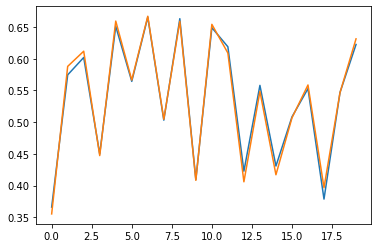

In [51]:
plt.plot(test_loss)
plt.plot(train_loss)

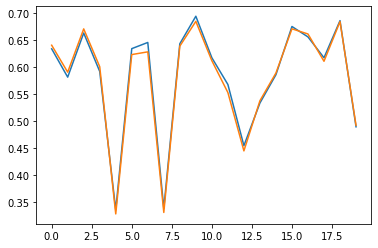

In [52]:
plt.plot(test_loss1)
plt.plot(train_loss1)

### Plot a decision boundry for TSNE embeddings

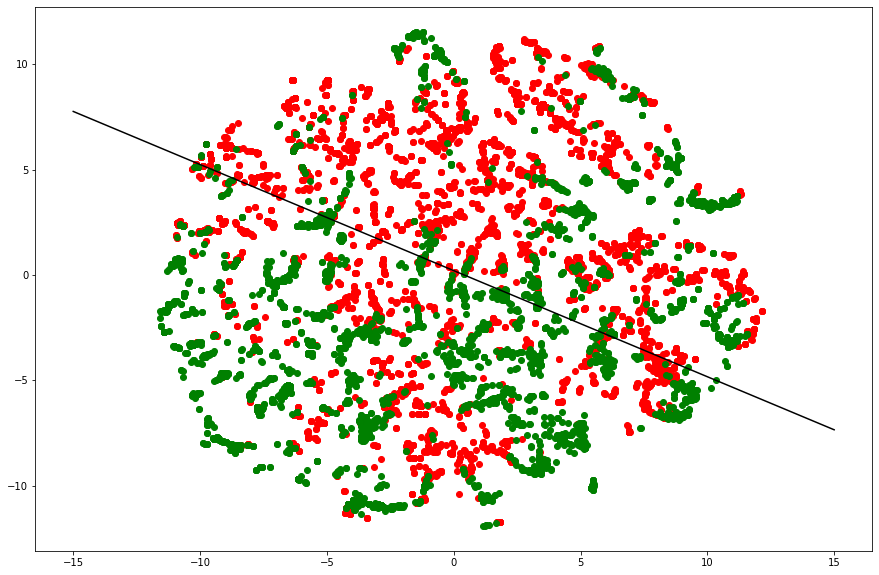

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(phishing_result[:,0], phishing_result[:,1], color='red')
plt.scatter(benign_result[:,0], benign_result[:,1], color='green')

x1 = np.linspace(-15,15,100)
x2 = [(p.coef_[0][0]/p.coef_[0][1])*x_+ (p.intercept_/p.coef_[0][1]) for x_ in x1]
plt.plot(x1,x2,color='black')
plt.show()

### Train perceptron multiple times to average out the accuracy for Entire Dataset

In [54]:
test_loss = []
test_loss1 = []
train_loss = []
train_loss1 = []

for epoch in range(20):
    
    print('epoch ->', epoch)

    p = Perceptron()
    p1 = Perceptron1(learning_rate = 0.01, n_iters= 1000)
    
    train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3)

    p.fit(train_data, train_labels)
    p1.fit(train_data, train_labels)

    predictions_train = p.predict(train_data)
    predictions_train1 = p1.predict(train_data)
    
    predictions_test = p.predict(test_data)
    predictions_test1 = p1.predict(test_data)
    
    train_score = accuracy_score(predictions_train, train_labels)
    train_score1 = accuracy_score(predictions_train1, train_labels)
    
    test_score = accuracy_score(predictions_test, test_labels)
    test_score1 = accuracy_score(predictions_test1, test_labels)

    print ('train accuracy = ', train_score)
    print ('train accuracy1 = ', train_score1)
    
    print ('test accuracy = ', test_score)
    print ('test accuracy1 = ', test_score1)
    
    print ('iterations used for inbuilt = ', p.n_iter_)
    print ('iterations used for custom = ', p1.n_iters)
    
    test_loss.append(test_score)    
    test_loss1.append(test_score1)    
    
    train_loss.append(train_score)
    train_loss1.append(train_score1)
    
    print ()

epoch -> 0
train accuracy =  0.901654174205221
train accuracy1 =  0.8876970793486689
test accuracy =  0.8984021706361169
test accuracy1 =  0.8851371721435032
iterations used for inbuilt =  6
iterations used for custom =  1000

epoch -> 1
train accuracy =  0.9166451279400362
train accuracy1 =  0.9043680537606616
test accuracy =  0.9125716008441362
test accuracy1 =  0.8962918299668375
iterations used for inbuilt =  8
iterations used for custom =  1000

epoch -> 2
train accuracy =  0.8991987593693461
train accuracy1 =  0.9127681571465495
test accuracy =  0.9065420560747663
test accuracy1 =  0.9186011456135061
iterations used for inbuilt =  7
iterations used for custom =  1000

epoch -> 3
train accuracy =  0.8675368312225381
train accuracy1 =  0.9104419746704575
test accuracy =  0.8589086523967441
test accuracy1 =  0.9059391015978293
iterations used for inbuilt =  9
iterations used for custom =  1000

epoch -> 4
train accuracy =  0.9064357715171879
train accuracy1 =  0.8931248384595503
tes

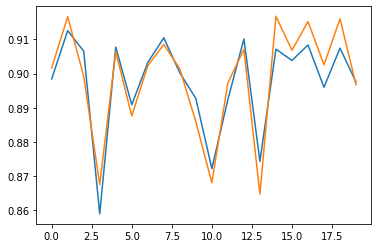

In [55]:
plt.plot(test_loss)
plt.plot(train_loss)

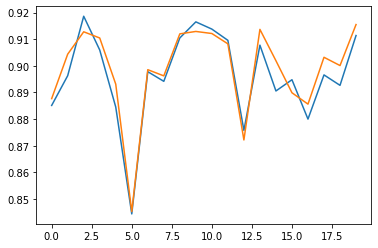

In [56]:
plt.plot(test_loss1)
plt.plot(train_loss1)

In [57]:
X.shape

(11055, 30)

In [58]:
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3)
train_data_del = train_data
test_data_del = test_data

In [59]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(train_data_del, train_labels)
clf.score(test_data_del, test_labels)

0.9279469400060295

In [60]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(train_data_del, train_labels)
neigh.score(test_data_del, test_labels)

0.9427193246909858

In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(train_data_del, train_labels)
clf.score(test_data_del, test_labels)

0.9472414832680133

In [62]:
acc = []
for i in range(3000):
    train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3)
    train_data_del = train_data
    test_data_del = test_data
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB().fit(train_data_del, train_labels)
    acc.append(gnb.score(test_data_del, test_labels))

In [63]:
sum(acc)/len(acc)

0.6039513616721963

In [64]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8, 4), random_state=2).fit(train_data_del, train_labels)
clf.score(test_data_del, test_labels)

C:\Users\yg375\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9484473922218872

### PCA

In [69]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, data['Result']], axis = 1)
PCA_df['Result'] = preprocessing.LabelEncoder().fit_transform(PCA_df['Result'])
PCA_df

,PC1,PC2,Result
0,1.894380,1.660751,0
1,-0.376141,1.217029,0
2,0.983997,1.022043,0
3,-0.703293,-0.557199,0
4,1.004164,0.667027,1
...,...,...,...
11050,3.651948,-1.374095,1
11051,3.895961,0.151018,0
11052,-1.226591,-0.026955,0
11053,1.371157,-1.921221,0


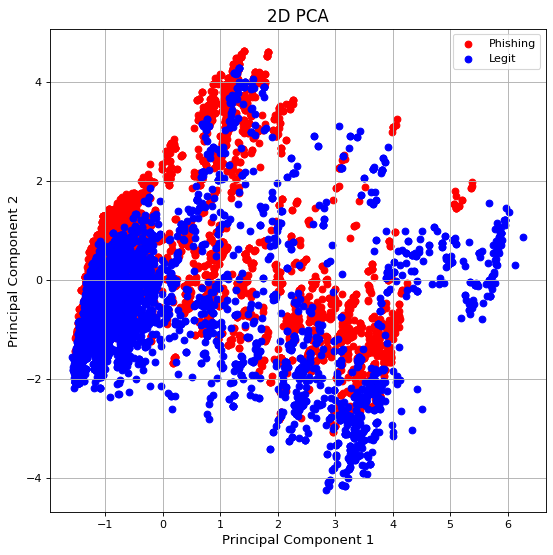

In [72]:
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['Result'] == clas, 'PC1'], PCA_df.loc[PCA_df['Result'] == clas, 'PC2'],c = color)

plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Phishing', 'Legit'])
plt.grid()

### Recursive Feature Eliminator

In [75]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(X_norm, Y)
rfe_support = rfe_selector.get_support()
rfe_feature = data.drop(columns=['Result']).loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

Fitting estimator with 30 features.
Fitting estimator with 20 features.
10 selected features
['Shortining_Service', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'web_traffic', 'Google_Index', 'Links_pointing_to_page']


### CHI2

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(X_norm, Y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_feature)

### Confusion Matrix

In [78]:
from sklearn.metrics import classification_report,confusion_matrix
classification_repo = classification_report(test_data_del, test_labels)

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

In [77]:
confusion_mat = confusion_matrix(test_data_del, test_labels)

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

In [ ]:
print(confusion_mat,"\n",classification_repo)